In [19]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statistics import stdev 
from numpy import mean, std
from numpy import cov
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn import preprocessing, metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
dataset = pd.read_csv("covid_train.csv")

print(dataset.isna().sum())

dataset['Outbreak_Related'].fillna('No',inplace=True)

df = dataset.dropna()



print(df.isna().sum())
df.head()
df.dtypes

Age_Group                     6
Client_Gender                 0
Case_AcquisitionInfo          0
Reporting_PHU_City            0
Outbreak_Related           9020
Reporting_PHU_Latitude        0
Reporting_PHU_Longitude       0
Outcome1                      0
dtype: int64
Age_Group                  0
Client_Gender              0
Case_AcquisitionInfo       0
Reporting_PHU_City         0
Outbreak_Related           0
Reporting_PHU_Latitude     0
Reporting_PHU_Longitude    0
Outcome1                   0
dtype: int64


Age_Group                   object
Client_Gender               object
Case_AcquisitionInfo        object
Reporting_PHU_City          object
Outbreak_Related            object
Reporting_PHU_Latitude     float64
Reporting_PHU_Longitude    float64
Outcome1                    object
dtype: object

In [21]:
# Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Age_Group'] = le.fit_transform(df['Age_Group'])

df.dtypes

<ipython-input-21-e1dbed908d6b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = le.fit_transform(df['Age_Group'])


Age_Group                    int32
Client_Gender               object
Case_AcquisitionInfo        object
Reporting_PHU_City          object
Outbreak_Related            object
Reporting_PHU_Latitude     float64
Reporting_PHU_Longitude    float64
Outcome1                    object
dtype: object

In [22]:
# One-hot encoding 
enc = OneHotEncoder(handle_unknown='ignore')

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough') 
df1 = np.array(columnTransformer.fit_transform(df), dtype = np.str) 

print(df1)

[['0.0' '0.0' '0.0' ... '43.41399692' '-79.74479581' 'Resolved']
 ['1.0' '0.0' '0.0' ... '43.5248813' '-80.2337433' 'Not Resolved']
 ['0.0' '0.0' '0.0' ... '44.41071258' '-79.68630597' 'Resolved']
 ...
 ['0.0' '0.0' '0.0' ... '43.1165366' '-79.2412197' 'Fatal']
 ['0.0' '0.0' '0.0' ... '44.048023' '-79.480239' 'Fatal']
 ['0.0' '0.0' '0.0' ... '43.65659125' '-79.37935801' 'Fatal']]


In [23]:
#df.astype('category')

In [24]:
for col in ['Client_Gender', 'Case_AcquisitionInfo', 'Reporting_PHU_City', 'Outbreak_Related', 'Outcome1']:
    df[col] = df[col].astype('category')
    
    
df['Client_Gender'] = df['Client_Gender'].cat.codes
df['Case_AcquisitionInfo'] = df['Case_AcquisitionInfo'].cat.codes
df['Reporting_PHU_City'] = df['Reporting_PHU_City'].cat.codes
df['Outbreak_Related'] = df['Outbreak_Related'].cat.codes
df
df.dtypes

<ipython-input-24-56cc78e2a997>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-24-56cc78e2a997>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Client_Gender'] = df['Client_Gender'].cat.codes
<ipython-input-24-56cc78e2a997>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Age_Group                     int32
Client_Gender                  int8
Case_AcquisitionInfo           int8
Reporting_PHU_City             int8
Outbreak_Related               int8
Reporting_PHU_Latitude      float64
Reporting_PHU_Longitude     float64
Outcome1                   category
dtype: object

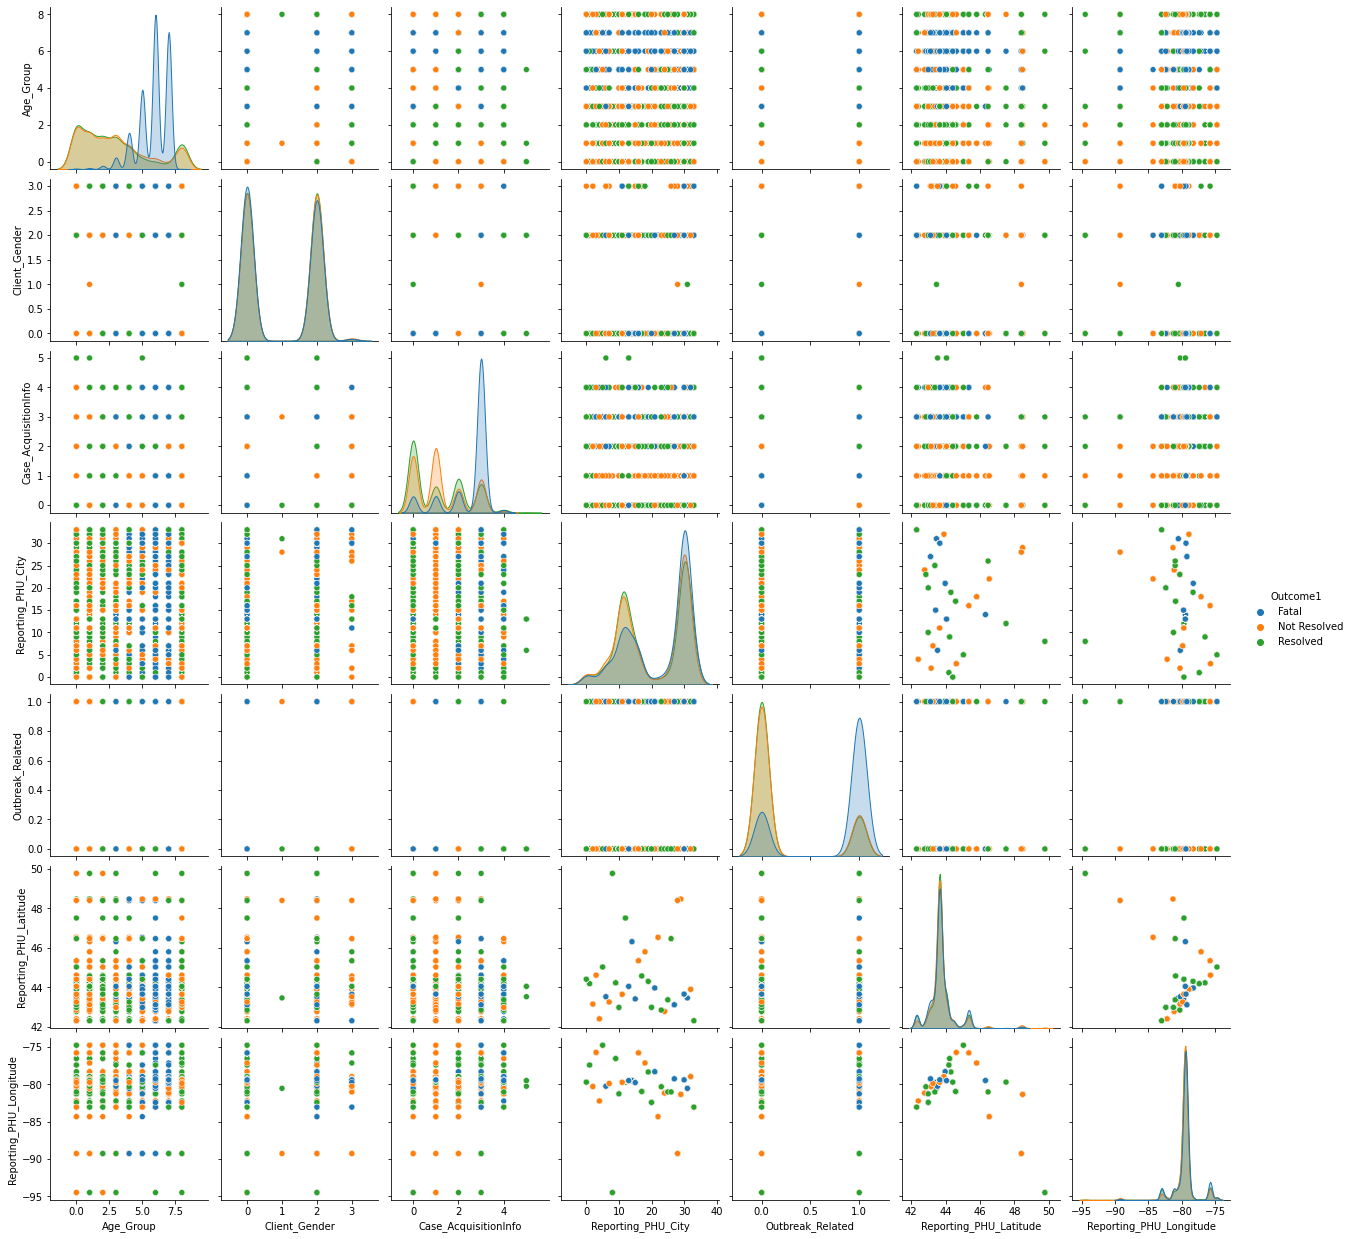

In [25]:
sns.pairplot(df, hue='Outcome1')

### 1.4 Extracting features and label from dataset

x variable contains all features values and y variable contains all target values.


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
#x = preprocessing.normalize(x)

In [27]:
# Get dummies
df2 = pd.get_dummies(df, prefix_sep='_', drop_first=True)
# X head
df2.head()

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1_Not Resolved,Outcome1_Resolved
0,3,2,2,15,0,43.413997,-79.744796,0,1
1,0,0,0,6,0,43.524881,-80.233743,1,0
2,7,0,3,0,1,44.410713,-79.686306,0,1
3,0,0,1,30,0,43.656591,-79.379358,0,1
4,7,0,3,16,1,45.345665,-75.763912,0,0


### 1.5 Testing accuracy without applying k-fold validation 

- Split data set into train and test using train_test_split.

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.15,random_state = None)

acc1 = []
depth = [3, 5, 10, None]
for k in depth:
    clf = DecisionTreeClassifier(max_depth = k)
    clf = clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(f"Depth : {k} ==> Accuracy:",metrics.accuracy_score(y_test, y_pred))

Depth : 3 ==> Accuracy: 0.6407723394701392
Depth : 5 ==> Accuracy: 0.6811854512797485
Depth : 10 ==> Accuracy: 0.6793893129770993
Depth : None ==> Accuracy: 0.6699595868881904


In [29]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
kfold.get_n_splits(x_train)

10

In [30]:
# Decsion Tree
from sklearn.tree import DecisionTreeClassifier
acc1 = []
depth = [3, 5, 10, None]
for k in depth:
    model = DecisionTreeClassifier(max_depth = k)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
    if ( k != None):
        print(f'Depth :  {k} ===> Accuracy = {mean(scores)} and Standard Devaition = {std(scores)}')
      
    else:
        print(f'Depth : {k} ===> Accuracy = {mean(scores)} and Standard Devaition = {std(scores)}')
    acc1 = np.append(acc1, mean(scores))

Depth :  3 ===> Accuracy = 0.6263280595105385 and Standard Devaition = 0.009122364137401922
Depth :  5 ===> Accuracy = 0.6508153919046464 and Standard Devaition = 0.008153113958879068
Depth :  10 ===> Accuracy = 0.6470908304857037 and Standard Devaition = 0.010429566493039054
Depth : None ===> Accuracy = 0.6442378385579326 and Standard Devaition = 0.014153185008541921


Text(0, 0.5, 'Accuracy')

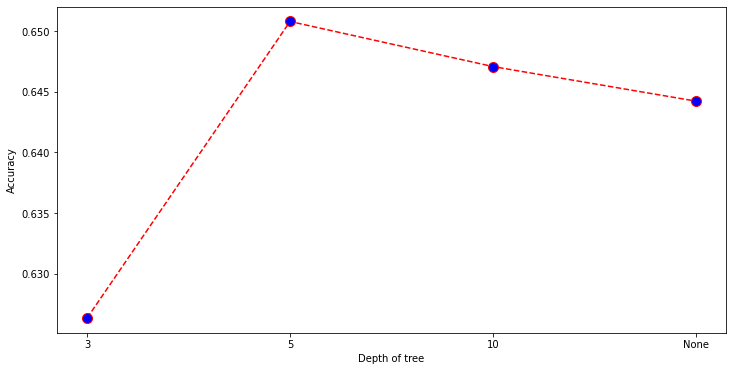

In [31]:
max_depth = list(map(str,depth))
plt.figure(figsize=(12,6))
plt.plot(max_depth,acc1, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')

In [32]:
depth = [3, 5, 10, None]
ntree = [5, 10, 50, 150, 200]

acc2=[]

for i in ntree:
    for k in depth:
            model = RandomForestClassifier(max_depth = k, n_estimators = i)
            scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
 
            if ( k != None):
                    print(f'Number of trees : {i} and Depth : {k}  ===> Accuracy =  {mean(scores)} and Standard Deviation = {std(scores)}')
      
            else:
                    print(f'Number of trees : {i} and Depth : {k}  ===> Accuracy =  {mean(scores)} and Standard Deviation = {std(scores)}')
 
            acc2 = np.append(acc2, mean(scores))
            


Number of trees : 5 and Depth : 3  ===> Accuracy =  0.60041140342168 and Standard Deviation = 0.02360448327012695
Number of trees : 5 and Depth : 5  ===> Accuracy =  0.6313982437906172 and Standard Deviation = 0.011734134411877107
Number of trees : 5 and Depth : 10  ===> Accuracy =  0.6519253076885374 and Standard Deviation = 0.010084253799369433
Number of trees : 5 and Depth : None  ===> Accuracy =  0.6415436394278684 and Standard Deviation = 0.010345063071100509
Number of trees : 10 and Depth : 3  ===> Accuracy =  0.6149936973020933 and Standard Deviation = 0.020926969460539825
Number of trees : 10 and Depth : 5  ===> Accuracy =  0.6413844067609159 and Standard Deviation = 0.014253152490387137
Number of trees : 10 and Depth : 10  ===> Accuracy =  0.6554117741686157 and Standard Deviation = 0.012639741626327668
Number of trees : 10 and Depth : None  ===> Accuracy =  0.6477251219380389 and Standard Deviation = 0.013588334021019041
Number of trees : 50 and Depth : 3  ===> Accuracy =  0.

Text(0.5, 1.0, 'Heat map for accuracy v/s (depth and number of trees) ')

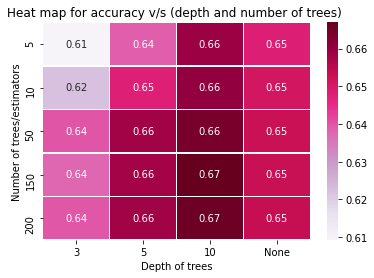

In [33]:
acc2 = [0.6093003258097598,0.6388702387758991 ,0.6591440460308384 ,0.6483002078285097,0.6222348825179014 ,0.648098732155336 ,0.6606270703440515,0.651197055914037,0.6400138401081797 ,0.6583386878669898,0.6644670423915706 ,0.6528126730013523,0.6379948179004783,0.6580018060206739,0.6669583072413261,0.6533514842948807,0.6397473839926671 ,0.6583394139054517 ,0.6659481154764174,0.6535533229872853]

acc2 = np.array(acc2)

acc2 = acc2.reshape(5,4)

df_heat = pd.DataFrame(data  = acc2 ,index = ['5', '10', '50', '150', '200'],columns = ['3', '5', '10', 'None'] )
sns.heatmap(df_heat,annot = True, linewidth = 0.5, cmap = "PuRd")
plt.xlabel("Depth of trees")
plt.ylabel("Number of trees/estimators")
plt.title("Heat map for accuracy v/s (depth and number of trees) ")

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
acc3 = []
n_estimators = [5, 10, 50, 150, 200]
for i in n_estimators:
    model = GradientBoostingClassifier(n_estimators = i)
    scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv = kfold, n_jobs=-1)
    print(f'Number of bossting stages =   {i} ==> Accuracy =  {mean(scores)} and Standard Devaition = {std(scores)}')
    acc3 = np.append(acc3, mean(scores))



Number of bossting stages =   5 ==> Accuracy =  0.6501017354726898 and Standard Devaition = 0.010181936144494485
Number of bossting stages =   10 ==> Accuracy =  0.6549352072601048 and Standard Devaition = 0.01262679426595908
Number of bossting stages =   50 ==> Accuracy =  0.6642880213550235 and Standard Devaition = 0.009097387494885235
Number of bossting stages =   150 ==> Accuracy =  0.6630209465734815 and Standard Devaition = 0.009498449985906448
Number of bossting stages =   200 ==> Accuracy =  0.6628619652603838 and Standard Devaition = 0.008791318373336673


Text(0, 0.5, 'Accuracy')

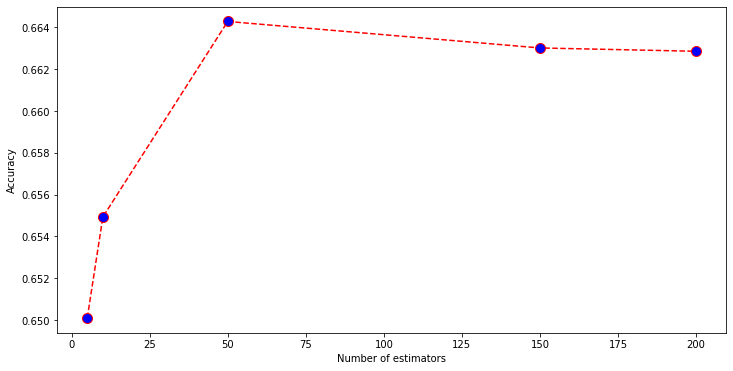

In [35]:
plt.figure(figsize=(12,6))
plt.plot(n_estimators,acc3, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')